In [14]:
import pandas as pd

from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

In [3]:
!ls ../raw_data/

 aecio.csv   bolsonaro	'Fernando Haddad'   jair	      mito
 biroliro    dilma.csv	 haddad		   'Jair Bolsonaro'


In [21]:
# df = pd.read_csv('../raw_data/biroliro/biroliro_total_tweets.csv')
df = pd.read_csv('../raw_data/mito/mito_total_tweets.csv')

In [22]:
#size
df.shape

(559591, 21)

In [23]:
df['location'].isna().sum()

146246

In [24]:
#languange distibuition 
df['lang'].value_counts()

pt     544813
es       5697
it       5004
tl       3055
fr        400
en        147
in         70
de         50
ht         49
eu         47
vi         34
ca         32
et         31
tr         29
lv         28
lt         25
und        21
is          9
da          9
hu          9
cs          7
pl          6
nl          6
no          4
ro          3
cy          2
sl          2
sv          1
hi          1
Name: lang, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559591 entries, 0 to 559590
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              559591 non-null  object
 1   date             559591 non-null  object
 2   content          559591 non-null  object
 3   id               559591 non-null  int64 
 4   reply_count      559591 non-null  int64 
 5   retweet_count    559591 non-null  int64 
 6   like_count       559591 non-null  int64 
 7   quote_count      559591 non-null  int64 
 8   lang             559591 non-null  object
 9   username         559591 non-null  object
 10  displayname      559386 non-null  object
 11  description      450439 non-null  object
 12  verified         559591 non-null  bool  
 13  created          559591 non-null  object
 14  followers_count  559591 non-null  int64 
 15  friends_count    559591 non-null  int64 
 16  location         413345 non-null  object
 17  protected 

### Checking most common tweet size

In [27]:
df['content_length'] = df.content.apply(len)

<AxesSubplot:>

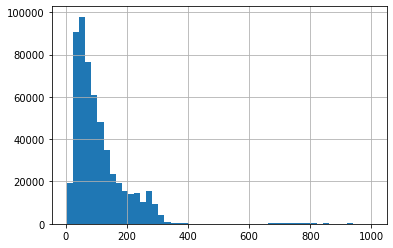

In [29]:
df['content_length'].hist(bins=50)

#### removing tweets with more than 200 characters

In [30]:

df = df.drop(df[df.content_length > 200].index)

In [31]:
df.shape

(484038, 22)

<AxesSubplot:>

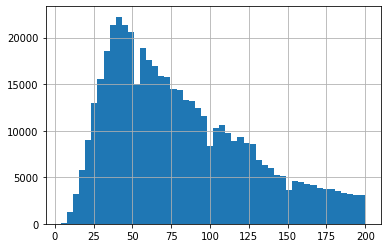

In [32]:
df['content_length'].hist(bins=50)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


In [ ]:
nltk.download('stopwords')

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

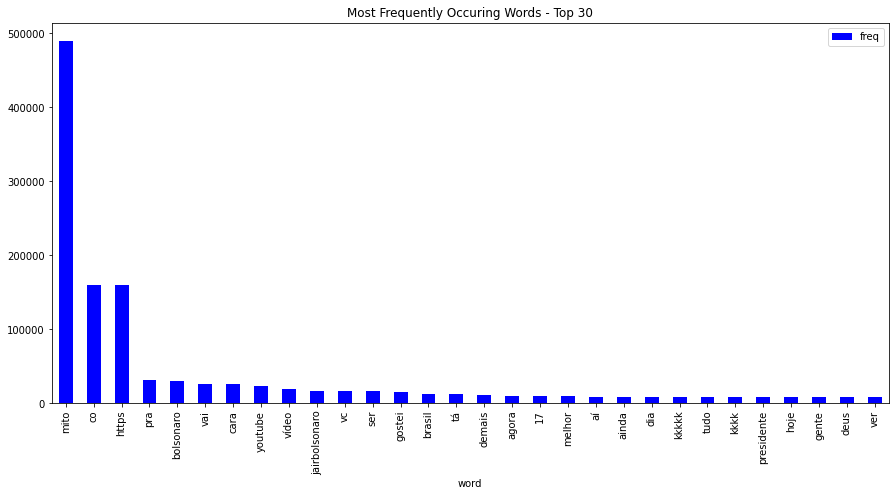

In [49]:
stop_words = stopwords.words('portuguese')
cv = CountVectorizer(stop_words = stop_words)
words = cv.fit_transform(df.content)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [1]:

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

NameError: name 'words_freq' is not defined

In [53]:
df.shape

(484038, 22)

In [68]:
import re

regex = r"#[^ !@#$%^&*(),.?\":{}|<>]*\b"

test_str = ("#asdasdasd asdasd #asdasd \n"
	"asdasd#asdasdasd #asdasdasd #asdasdas\n")

p = re.compile(regex)
p.findall(test_str)

['#asdasdasd', '#asdasd', '#asdasdasd', '#asdasdasd', '#asdasdas']

In [66]:
p.findall(test_str)

['#asdasdasd', '#asdasd', '#asdasdasd', '#asdasdasd', '#asdasdas']